In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set up plotting style for better visualizations
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Sequential Bayesian Learning - Globe Tossing

## Concept Overview

This notebook demonstrates one of the most powerful aspects of Bayesian inference: **sequential learning**. Unlike frequentist methods that require all data at once, Bayesian inference can incorporate new evidence incrementally, updating beliefs as new observations arrive.

## The Sequential Learning Process

In sequential Bayesian updating, today's posterior becomes tomorrow's prior:

$$P(\theta|x_1, x_2, \ldots, x_n) \propto P(x_n|\theta) \times P(\theta|x_1, x_2, \ldots, x_{n-1})$$

This means:
- **Current posterior** = **New likelihood** × **Previous posterior**
- Each observation refines our beliefs about the parameter
- The order of observations doesn't matter (assuming independence)
- We can update our beliefs in real-time as new data arrives

## Mathematical Framework

For the globe tossing problem with sequential observations:

**Initial State:**
$$P(\theta) = \text{Uniform}(0,1)$$

**After observation } i \text{:**
$$P(\theta|x_1, \ldots, x_i) \propto P(x_i|\theta) \times P(\theta|x_1, \ldots, x_{i-1})$$

Where:
- $\theta = p$ is the proportion of water
- $x_i \in \{W, L\}$ is the $i$-th observation (Water or Land)
- $P(x_i|\theta) = \theta$ if $x_i = W$, and $P(x_i|\theta) = 1-\theta$ if $x_i = L$

## Our Data Sequence

We'll observe the same sequence as before: **W, W, L, W, L, W, W, W, L**
- Total: 6 Water (W) and 3 Land (L) tosses
- But this time, we'll see how our beliefs evolve with each new observation"

In [9]:
# Our sequence of observations from globe tossing
obs = np.array(["W", "W", "L", "W", "L", "W", "W", "W", "L"])

print(f"Observation sequence: {' → '.join(obs)}")
print(f"Total observations: {len(obs)}")
print(f"Water (W) count: {np.sum(obs == 'W')}")
print(f"Land (L) count: {np.sum(obs == 'L')}")

# Create parameter grid - using fewer points for efficiency in visualization
p_grid = np.linspace(0, 1, 101)  # 101 points for smoother curves
print(f"\nParameter grid: {len(p_grid)} points from {p_grid[0]} to {p_grid[-1]}")

# Initial uniform prior - represents complete ignorance
prior = np.ones_like(p_grid)
prior /= prior.sum()  # Normalize to sum to 1 (proper probability distribution)
prior0 = prior.copy()  # Save initial prior for later reference

print(f"Initial prior: uniform distribution")
print(f"Prior sum (should be 1.0): {prior.sum():.6f}")

# Container to store all posterior distributions for plotting
posteriors = []

Observation sequence: W → W → L → W → L → W → W → W → L
Total observations: 9
Water (W) count: 6
Land (L) count: 3

Parameter grid: 101 points from 0.0 to 1.0
Initial prior: uniform distribution
Prior sum (should be 1.0): 1.000000


## Setup: Data and Initial Prior

Let's define our observation sequence and set up the initial conditions for sequential learning."

## Sequential Bayesian Updates

Now we'll implement the core sequential learning algorithm. For each new observation, we:

1. **Compute likelihood** based on the observation
2. **Update posterior** = previous posterior × new likelihood  
3. **Normalize** to ensure proper probability distribution
4. **Store result** and use it as prior for next observation

### Likelihood Functions

For each observation $x_i$:
- If $x_i = W$ (Water): $P(x_i|\theta) = \theta$
- If $x_i = L$ (Land): $P(x_i|\theta) = 1 - \theta$"

In [10]:
# Sequential Bayesian updating loop
print("Sequential Learning Progress:")
print("=" * 50)

for i, observation in enumerate(obs):
    print(f"\nStep {i+1}: Observing '{observation}'")
    
    # Step 1: Compute likelihood for this observation
    if observation == "W":
        likelihood = p_grid  # P(W|p) = p
        print(f"  Likelihood: P(W|p) = p")
    else:  # observation == "L"
        likelihood = 1 - p_grid  # P(L|p) = 1-p
        print(f"  Likelihood: P(L|p) = 1-p")
    
    # Step 2: Compute unnormalized posterior
    # Posterior ∝ Likelihood × Prior
    posterior_unnorm = prior * likelihood
    
    # Step 3: Normalize to get proper probability distribution
    posterior = posterior_unnorm / posterior_unnorm.sum()
    
    # Step 4: Store for visualization
    posteriors.append(posterior.copy())
    
    # Step 5: Current posterior becomes next prior (sequential learning!)
    prior = posterior.copy()
    
    # Report summary statistics
    map_estimate = p_grid[np.argmax(posterior)]
    post_mean = (p_grid * posterior).sum()
    
    print(f"  MAP estimate: {map_estimate:.3f}")
    print(f"  Posterior mean: {post_mean:.3f}")
    print(f"  Max posterior density: {posterior.max():.4f}")

print(f"\n" + "=" * 50)
print("Sequential learning complete!")

# Final summary
final_water_count = np.sum(obs == "W")
final_total_count = len(obs)
print(f"Final data: {final_water_count} water out of {final_total_count} tosses")
print(f"Final MAP estimate: {p_grid[np.argmax(posterior)]:.3f}")
print(f"Final posterior mean: {(p_grid * posterior).sum():.3f}")
print(f"Observed proportion: {final_water_count/final_total_count:.3f}")

Sequential Learning Progress:

Step 1: Observing 'W'
  Likelihood: P(W|p) = p
  MAP estimate: 1.000
  Posterior mean: 0.670
  Max posterior density: 0.0198

Step 2: Observing 'W'
  Likelihood: P(W|p) = p
  MAP estimate: 1.000
  Posterior mean: 0.754
  Max posterior density: 0.0296

Step 3: Observing 'L'
  Likelihood: P(L|p) = 1-p
  MAP estimate: 0.670
  Posterior mean: 0.600
  Max posterior density: 0.0178

Step 4: Observing 'W'
  Likelihood: P(W|p) = p
  MAP estimate: 0.750
  Posterior mean: 0.667
  Max posterior density: 0.0211

Step 5: Observing 'L'
  Likelihood: P(L|p) = 1-p
  MAP estimate: 0.600
  Posterior mean: 0.571
  Max posterior density: 0.0207

Step 6: Observing 'W'
  Likelihood: P(W|p) = p
  MAP estimate: 0.670
  Posterior mean: 0.625
  Max posterior density: 0.0230

Step 7: Observing 'W'
  Likelihood: P(W|p) = p
  MAP estimate: 0.710
  Posterior mean: 0.667
  Max posterior density: 0.0255

Step 8: Observing 'W'
  Likelihood: P(W|p) = p
  MAP estimate: 0.750
  Posterior me

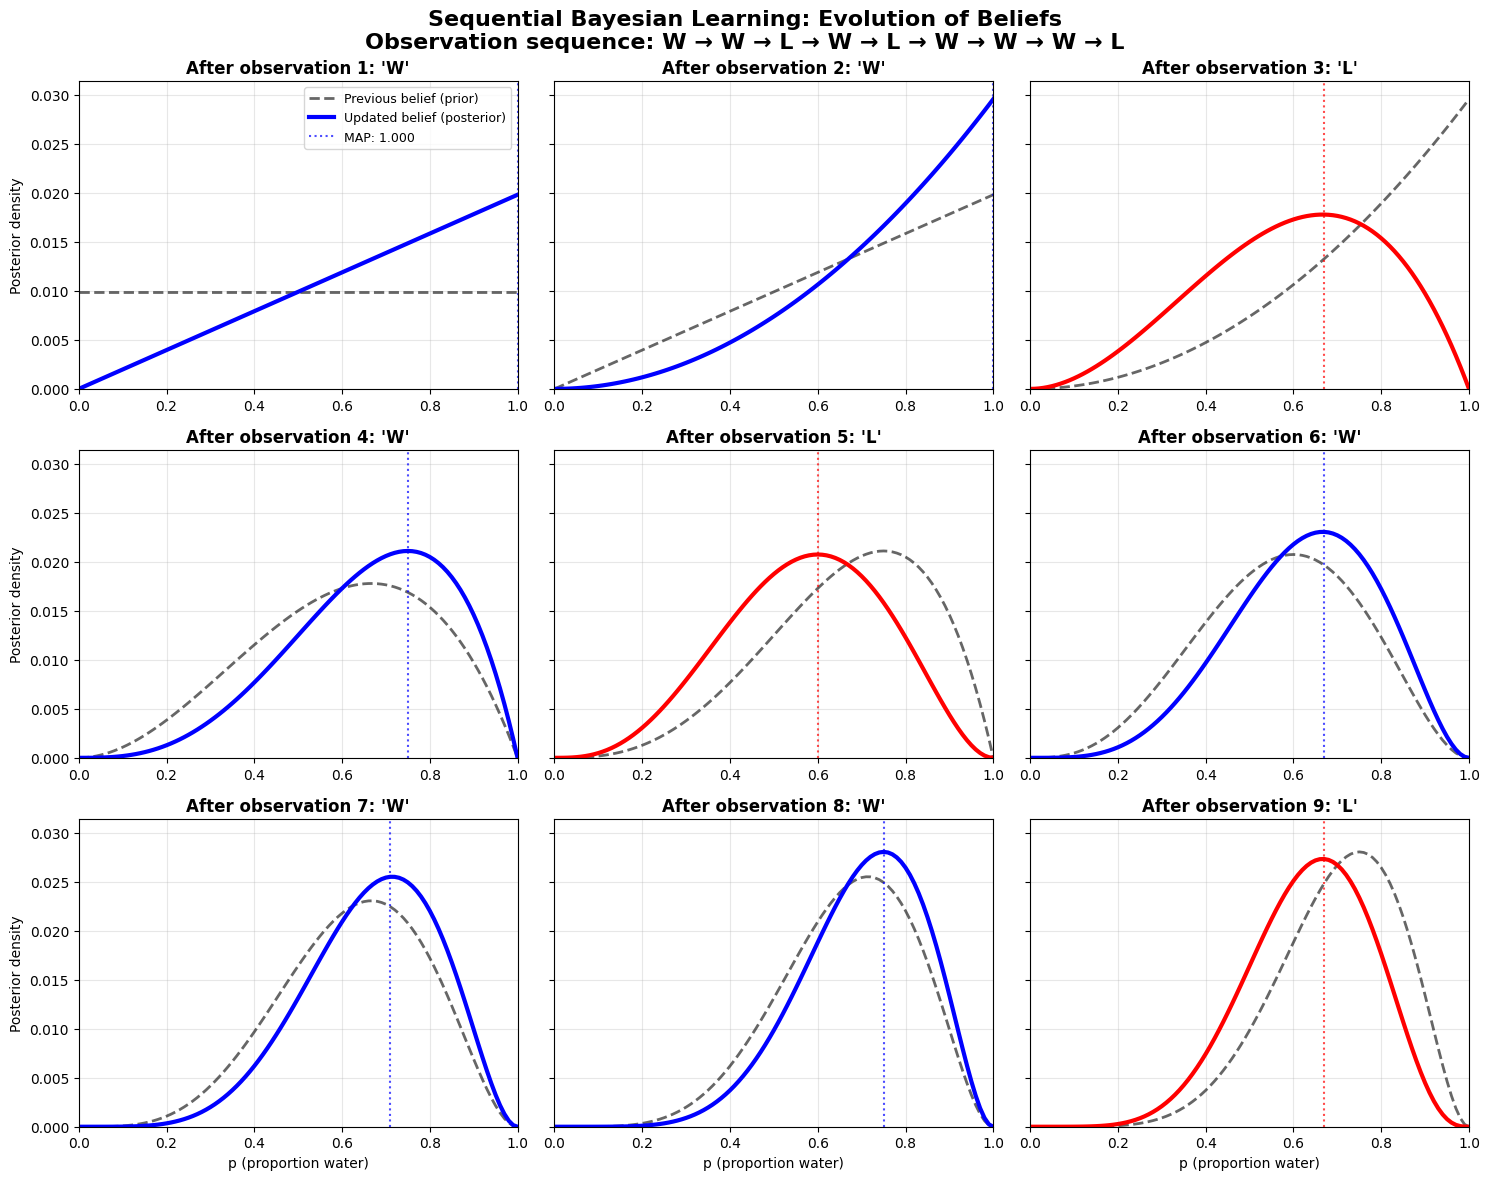

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharey=True)
axes = axes.ravel()  # Flatten to 1D array for easy indexing

prior_prev = prior0  # Start with initial uniform prior

for i, ax in enumerate(axes):
    posterior_curr = posteriors[i]  # Current posterior after observation i+1
    observation = obs[i]  # Current observation
    
    # Plot previous posterior (prior for this step) as dotted line
    ax.plot(p_grid, prior_prev, 'k--', alpha=0.6, linewidth=2, 
            label="Previous belief (prior)")
    
    # Plot current posterior as solid colored line
    color = 'blue' if observation == 'W' else 'red'
    ax.plot(p_grid, posterior_curr, color=color, linewidth=3, 
            label=f"Updated belief (posterior)")
    
    # Add vertical line at MAP estimate
    map_idx = np.argmax(posterior_curr)
    map_value = p_grid[map_idx]
    ax.axvline(x=map_value, color=color, linestyle=':', alpha=0.7,
               label=f'MAP: {map_value:.3f}')
    
    # Formatting
    ax.set_title(f"After observation {i+1}: '{observation}'", 
                fontsize=12, fontweight='bold')
    ax.set_ylim(0, posterior_curr.max() * 1.15)
    ax.set_xlim(0, 1)
    ax.grid(True, alpha=0.3)
    
    # Add legend only to first subplot to avoid clutter
    if i == 0:
        ax.legend(loc='upper right', fontsize=9)
    
    # Add x-label only to bottom row
    if i >= 6:
        ax.set_xlabel('p (proportion water)', fontsize=10)
    
    # Add y-label only to leftmost column
    if i % 3 == 0:
        ax.set_ylabel('Posterior density', fontsize=10)
    
    # Update prior for next iteration
    prior_prev = posterior_curr.copy()

# Overall title
fig.suptitle('Sequential Bayesian Learning: Evolution of Beliefs\n' + 
             f'Observation sequence: {" → ".join(obs)}', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Make room for suptitle
plt.show()

## Visualization: Evolution of Beliefs

Now let's visualize how our beliefs about $p$ evolved with each new observation. Each subplot shows:

- **Dotted line**: Previous belief (prior for this step)
- **Solid line**: Updated belief (posterior after seeing new data)
- **Title**: Which observation we just incorporated

This visualization powerfully demonstrates how Bayesian learning accumulates evidence sequentially."

## Key Insights from Sequential Learning

### 1. **Progressive Concentration**
Notice how the posterior distribution becomes increasingly **concentrated** (peaked) as we accumulate more evidence. This represents decreasing uncertainty about the true value of $p$.

### 2. **Order Independence** 
The final posterior depends only on the **total counts** of W and L, not their order. We would get the same final result with any permutation of our observations.

### 3. **Adaptive Learning Rate**
- **Early observations** have dramatic effects on beliefs (flat → peaked)
- **Later observations** have smaller effects (posterior already concentrated)
- This mimics how humans learn: early evidence is most influential

### 4. **Real-time Updates**
Unlike frequentist methods, we don't need all the data upfront. We can update our beliefs in real-time as new observations arrive.

## Mathematical Properties

### Beta-Binomial Conjugacy
With uniform prior, after $W$ water observations and $L$ land observations:
$$P(p|data) = \text{Beta}(W+1, L+1)$$

Our final result should match: $\text{Beta}(6+1, 3+1) = \text{Beta}(7, 4)$

### Posterior Predictive
Given our current beliefs about $p$, the probability that the **next** toss is water:
$$P(X_{next} = W | data) = \int_0^1 p \cdot P(p|data) \, dp = E[p|data]$$

This is simply our posterior mean!"

In [12]:
# Let's verify our sequential result matches the batch result
print("Verification: Sequential vs. Batch Learning")
print("=" * 45)

# Our sequential result
sequential_final = posteriors[-1]
sequential_mean = (p_grid * sequential_final).sum()
sequential_map = p_grid[np.argmax(sequential_final)]

print(f"Sequential Learning Results:")
print(f"  Posterior mean: {sequential_mean:.4f}")
print(f"  MAP estimate: {sequential_map:.4f}")

# Batch computation (all data at once)
W_total = np.sum(obs == "W")
L_total = np.sum(obs == "L")
batch_likelihood = np.power(p_grid, W_total) * np.power(1 - p_grid, L_total)
batch_posterior_unnorm = batch_likelihood * prior0  # Use original uniform prior
batch_posterior = batch_posterior_unnorm / batch_posterior_unnorm.sum()

batch_mean = (p_grid * batch_posterior).sum()
batch_map = p_grid[np.argmax(batch_posterior)]

print(f"\nBatch Learning Results:")
print(f"  Posterior mean: {batch_mean:.4f}")
print(f"  MAP estimate: {batch_map:.4f}")

# Check if they match (within numerical precision)
mean_diff = abs(sequential_mean - batch_mean)
map_diff = abs(sequential_map - batch_map)

print(f"\nDifferences (should be near zero):")
print(f"  Mean difference: {mean_diff:.8f}")
print(f"  MAP difference: {map_diff:.8f}")

if mean_diff < 1e-6 and map_diff < 1e-6:
    print("✓ Sequential and batch learning give identical results!")
else:
    print("⚠ Results differ - check implementation")

# Theoretical Beta(7,4) comparison
from scipy.stats import beta
theoretical_mean = 7 / (7 + 4)  # Beta mean = α/(α+β)
theoretical_mode = (7 - 1) / (7 + 4 - 2)  # Beta mode = (α-1)/(α+β-2) when α,β > 1

print(f"\nTheoretical Beta(7,4) Results:")
print(f"  Theoretical mean: {theoretical_mean:.4f}")
print(f"  Theoretical mode: {theoretical_mode:.4f}")

print(f"\nPosterior Predictive:")
print(f"  P(next toss = W | data) = {sequential_mean:.4f}")
print(f"  This is our posterior mean!")

Verification: Sequential vs. Batch Learning
Sequential Learning Results:
  Posterior mean: 0.6364
  MAP estimate: 0.6700

Batch Learning Results:
  Posterior mean: 0.6364
  MAP estimate: 0.6700

Differences (should be near zero):
  Mean difference: 0.00000000
  MAP difference: 0.00000000
✓ Sequential and batch learning give identical results!

Theoretical Beta(7,4) Results:
  Theoretical mean: 0.6364
  Theoretical mode: 0.6667

Posterior Predictive:
  P(next toss = W | data) = 0.6364
  This is our posterior mean!


## Extensions and Applications

### Real-world Applications of Sequential Learning

1. **Online A/B Testing**: Update conversion rate estimates as users interact with your website
2. **Medical Trials**: Update treatment effectiveness estimates as patient outcomes are observed  
3. **Quality Control**: Update defect rate estimates as products are inspected
4. **Financial Modeling**: Update risk estimates as market data arrives
5. **Machine Learning**: Online learning algorithms that adapt to streaming data

### Advantages of Sequential Bayesian Learning

- ✅ **Real-time updates**: No need to wait for all data
- ✅ **Natural uncertainty quantification**: Full posterior distribution
- ✅ **Incorporates prior knowledge**: Can start with informed priors
- ✅ **Interpretable**: Clear probabilistic statements about parameters
- ✅ **Robust**: Less sensitive to outliers than point estimates

### Connection to Statistical Rethinking

This notebook demonstrates core concepts from **Statistical Rethinking Chapter 2**:
- Grid approximation for posterior computation
- Sequential updating as evidence accumulates
- The relationship between likelihood, prior, and posterior
- How Bayesian learning naturally handles uncertainty

### Next Steps

- Explore different priors (informative vs non-informative)
- Implement credible intervals for uncertainty bounds
- Compare with MCMC sampling methods (PyMC)
- Study the effect of sample size on posterior concentration
- Investigate robustness to prior misspecification"